# ME460 Linkages - Prof. Mark Ganter
# 4 position function generator via characteristic equations
# dyad-standard  equations (r1+r5=r3 form)

posl2= d1*(-0.00378 + 0.0872*I)*exp(I*t1) + d5*(exp(I*g2) - 1.0)*exp(I*t5) - 0.0303 - 0.346*I
posl3= d1*(-0.0151 + 0.174*I)*exp(I*t1) + d5*(exp(I*g3) - 1.0)*exp(I*t5) + 0.0597 - 0.682*I
posl4= d1*(-0.0341 + 0.259*I)*exp(I*t1) + d5*(exp(I*g4) - 1.0)*exp(I*t5) + 0.259 - 0.966*I

left char solution g3 & g4 42.67753160576685 64.0527666015018
abs(left_char)= 1.89411944152296e-8

posl3= d1*(-0.0151 + 0.174*I)*exp(I*t1) + d5*(-0.265 + 0.678*I)*exp(I*t5) + 0.0597 - 0.682*I
posl4= d1*(-0.0341 + 0.259*I)*exp(I*t1) + d5*(-0.563 + 0.899*I)*exp(I*t5) + 0.0597 - 0.682*I

left 3pos solution r1,t1,r5,t5 = 9.31270581553423 -75.34199438590642 2.19057426662797 63.791990125360385
abs(posl4)= 0.000223
abs(posl3)= 0.000149

phi2 = 5.0 phi3 = 10.0 phi4 = 14.999999999999998
psi2 = 20.0 psi3 = 40.0 psi4 = 59.99999999999999
gamma2 = 21.374871088604706 gamma3 = 42.67753160576685 gamma4 = 64.0527666015018
del2 = 0.0303 + 0.346*I
del3 = -0.0596 + 0.681*I
del4 = -0.259 + 0.966*I

R1 = ( 2.36 - 9.01*I )  ( 9.31 @ -7

<IPython.core.display.Javascript object>


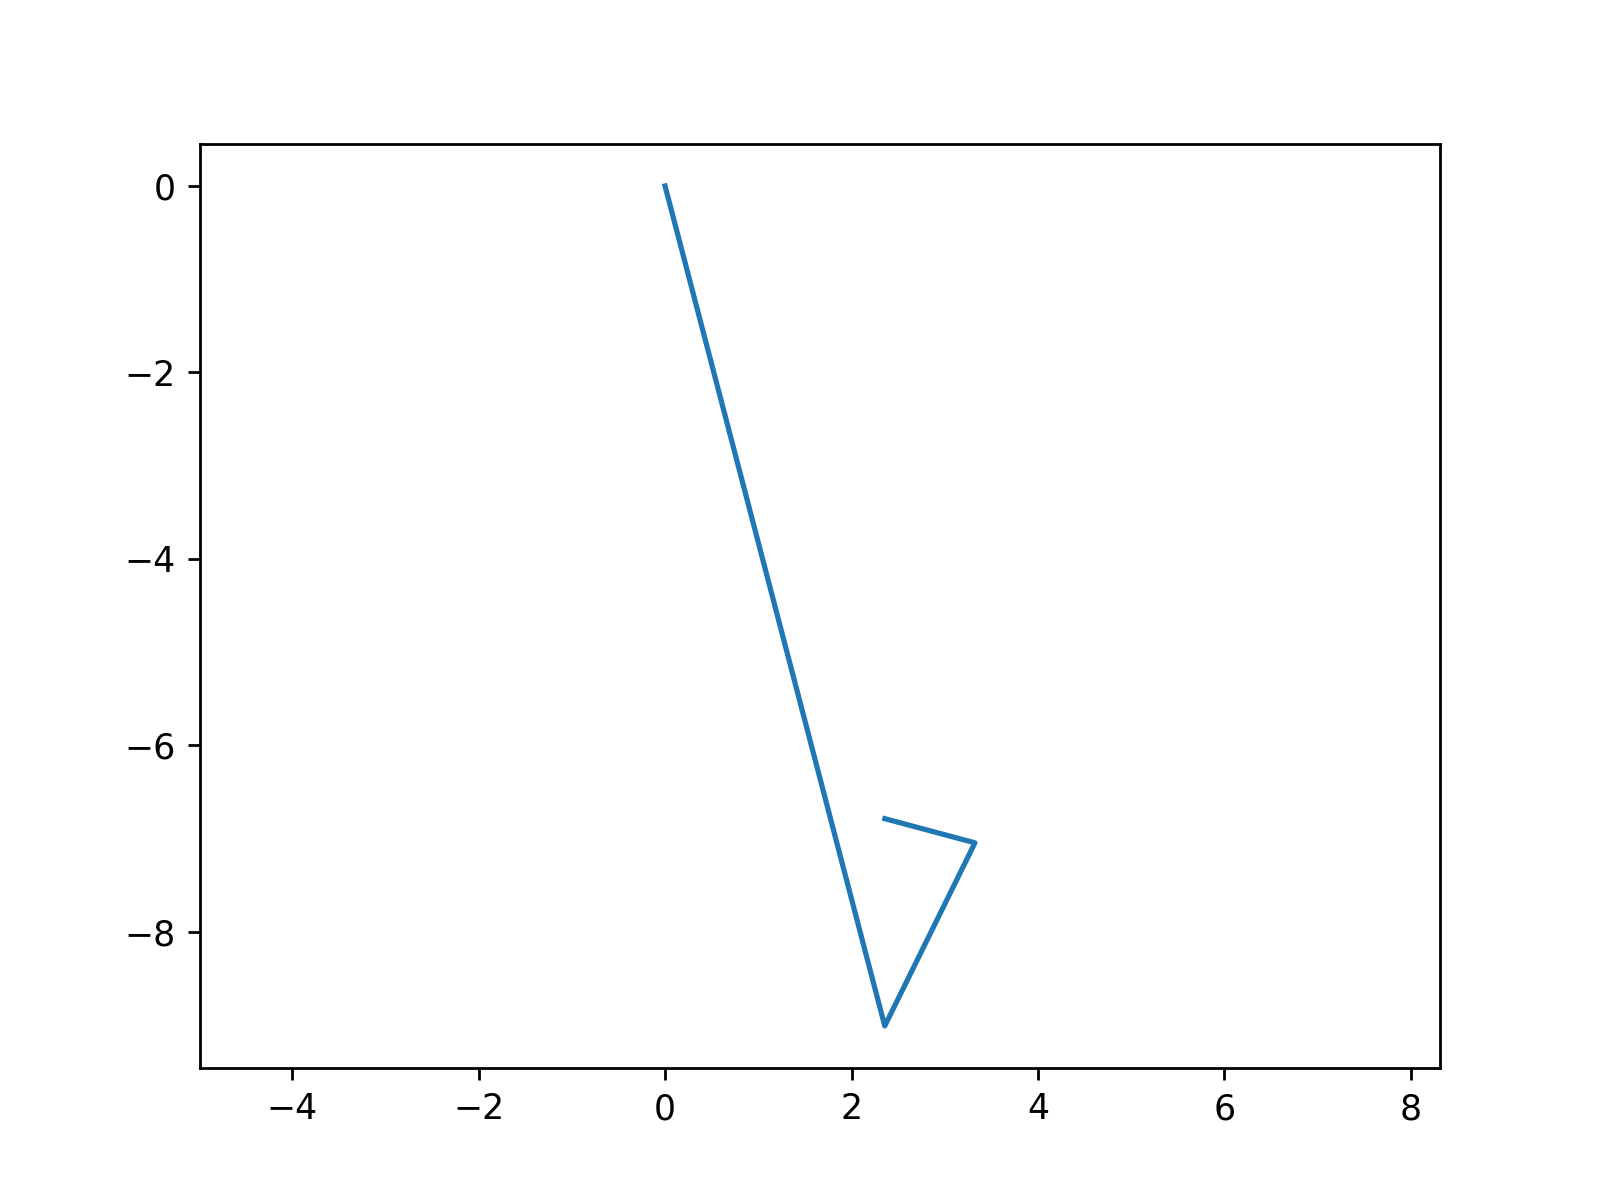

In [5]:
%matplotlib notebook
# this command tells notebook to display plots in the notebook
from math import *
from sympy import *
import numpy as np
import random

import matplotlib.pyplot as plt

#define random angle function
def randang():
   return(2*np.pi*random.random())

d1,t1 = symbols("d1 t1", real=True)
d5,t5= symbols("d5 t5", real=True)
g2,g3,g4 = symbols("g2 g3 g4", real=True)
#s2,s3,s4 = symbols("s2 s3 s4",real=True)

r1 = d1*exp(I*t1)
r5 = d5*exp(I*t5)

# inputs phi's and psi's
p2 = radians(5)
p3 = radians(10)
p4 = radians(15)

s2 = radians(20)
s3 = radians(40)
s4 = radians(60)

# free choices gamma's 
#g2choice = radians(-65)
g2choice = randang()


# for r3 you only need to choose the angle as the length is always 1.0
r3 = 1.0*exp(I*radians(-15.0))

#compute deltas
del2 = r3*(exp(I*s2)-1)
del3 = r3*(exp(I*s3)-1)
del4 = r3*(exp(I*s4)-1)

#write out the dyad-standard equations for left side of linkage 
posl2 = r1*(exp(I*p2)-1) + r5*(exp(I*g2)-1) - del2
posl3 = r1*(exp(I*p3)-1) + r5*(exp(I*g3)-1) - del3
posl4 = r1*(exp(I*p4)-1) + r5*(exp(I*g4)-1) - del4


print("posl2=",N(posl2,3))
print("posl3=",N(posl3,3))
print("posl4=",N(posl4,3))
print()

# characteristic polynomial approach

leftside = Matrix([[(exp(I*p2)-1),(exp(I*g2choice)-1),del2],[(exp(I*p3)-1),(exp(I*g3)-1),del3],[(exp(I*p4)-1),(exp(I*g4)-1),del4]])
detleft = leftside.det()
detlefta = detleft.subs(g2,g2choice)
#print("detlefta=",detlefta)

#next solve left characteristic equation for g3 and g4
ans = nsolve((re(detlefta),im(detlefta)), (g3, g4), (radians(-7),radians(10)), 
            maxsteps=200, tol=1.0e-6, verify=false)  #, verbose=true )

print("left char solution g3 & g4",degrees(ans[0]),degrees(ans[1]))
print ("abs(left_char)=",abs(detlefta.evalf(subs={g3:ans[0],g4:ans[1]}) ))
print()

# now plug in results from left characteristic equation into pos. 3 & pos. 4 dyad equation and solve
pos2a = posl2.subs(g2,g2choice)
pos3a = posl3.subs(g3,ans[0])
pos4a = posl4.subs(g4,ans[1])

# set g's before information is overwritten
g2a = g2choice
g3a = ans[0]
g4a = ans[1]

# LEFT SIDE #

#write out the dyad-standard equations for left side of linkage 
posl2 = r1*(exp(I*p2)-1) + r5*(exp(I*g2a)-1) - del2
posl3 = r1*(exp(I*p3)-1) + r5*(exp(I*g3a)-1) - del3
posl4 = r1*(exp(I*p4)-1) + r5*(exp(I*g4a)-1) - del3



print("posl3=",N(posl3,3))
print("posl4=",N(posl4,3))
print()

ansl = nsolve((re(posl4),im(posl4),re(posl3),im(posl3)), (d1, t1, d5, t5), (1,radians(-80),5 ,radians(60)), 
            maxsteps=200, tol=1.0e-3, verify=false)

print("left 3pos solution r1,t1,r5,t5 =",ansl[0],degrees(ansl[1]),ansl[2],degrees(ansl[3]))
print ("abs(posl4)=",N(abs(posl4.evalf(subs={d1:ansl[0],t1:ansl[1],d5:ansl[2],t5:ansl[3]}) ),3))
print ("abs(posl3)=",N(abs(posl3.evalf(subs={d1:ansl[0],t1:ansl[1],d5:ansl[2],t5:ansl[3]}) ),3))
print()


# RIGHT SIDE #
# there is only one side -- the left for function generators


evalr1 = N(r1.evalf(subs={d1:ansl[0],t1:ansl[1]}),3)
evalr3 = N(r3,3)
evalr5 = N(r5.evalf(subs={d5:ansl[2],t5:ansl[3]}),3)
evalr6 = evalr1+evalr5-evalr3

print("phi2 =",degrees(p2),"phi3 =",degrees(p3),"phi4 =",degrees(p4))
print("psi2 =",degrees(s2),"psi3 =",degrees(s3),"psi4 =",degrees(s4))
print("gamma2 =",degrees(g2a),"gamma3 =",degrees(g3a),"gamma4 =",degrees(g4a))
print("del2 =",N(del2.evalf(),3))
print("del3 =",N(del3.evalf(),3))
print("del4 =",N(del4.evalf(),3))
print()

print("R1 = (",evalr1,")  (", abs(evalr1),"@",degrees(arg(evalr1)),"degs)")
print("R3 = (",evalr3,")  (", abs(evalr3),"@",degrees(arg(evalr3)),"degs)")
print("R5 = (",evalr5,")  (", abs(evalr5),"@",degrees(arg(evalr5)),"degs)")
print("R6 = (",evalr6,")  (", abs(evalr6),"@",degrees(arg(evalr6)),"degs)")
print()

# attempt to rate the linkage
print("* Linkage Rating *")
s = min(abs(evalr1),abs(evalr3),abs(evalr5),abs(evalr6))
l = max(abs(evalr1),abs(evalr3),abs(evalr5),abs(evalr6))
pnq = abs(evalr1)+abs(evalr3)+abs(evalr5)+abs(evalr6)-(s+l)
print('P+Q > S+L =',pnq ,'>',(s+l) )
if (abs(evalr1)+abs(evalr3)+abs(evalr5)+abs(evalr6)-(s+l)) > (s+l):
    print("grashof = true")
else:
    print("grashof = false")
    
print("Link length ratio l/s = ",l/s)
print()

evalOa = 0
evalA = evalr1
evalB = evalr1+evalr5
evalOb = evalr1+evalr5-evalr3
print("Oa = ( 0 + I*0 )")
print("A = (",evalA,")")
print("B = (",evalB,")")
print("Ob = (",evalOb,")")

# call matplotlib routines for a scatter plot 
fig, ax = plt.subplots()
ax.plot([0,re(evalA),re(evalB),re(evalOb)], 
        [0,im(evalA),im(evalB),im(evalOb)])
ax.set_aspect('equal',adjustable='datalim')
plt.show()



In [ ]:
from math import *
from sympy import *
N(degrees(arg(-89-44*I)),3)